####**FIYIN OLANIYI**
### PROJECT
LINK https://www.kaggle.com/competitions/playground-series-s3e22/data?select=train.csv
##Given various medical indicators, I am asked to predict the health outcomes of horses. At the end to print for each id in the test set, predicting the corresponding outcome (Lived, Died or euthanized) using a machine learning model.
# While reading about this dataset, I found that it is synthetic (created by using algorithms and simulations based on generative artificial intelligence technologies) which explains certain inconsistencies.

#**Some cols description**
Surgery - had surgery/ not

age - Adult horse 2 = Young (< 6 months)

Hospital number - numeric id - the case number assigned to the horse (may not be unique if the horse is treated > 1 time)

rectal_temp - linear - in degrees celsius. - An elevated temp may occur due to infection

pulse - the heart rate in beats per minute - is a reflection of the heart condition

respiratory_rate - normal rate is 8 to 10 - usefulness is doubtful due to the great fluctuations(most were in 30s)

temp_of_extremities - a subjective indication of peripheral circulation - possible values: 1 = Normal 2 = Warm 3 = Cool 4 = Cold

peripheral_pulse - subjective - possible values are: 1 = normal 2 = increased 3 = reduced 4 = absent

mucous_membrane - a subjective measurement of colour - possible values are: 1 = normal pink 2 = bright pink 3 = pale pink 4 = pale cyanotic 5 = bright red / injected 6 = dark cyanotic - 1 and 2 probably indicate a normal or slightly increased circulation - 3 may occur in early shock - 4 and 6 are indicative of serious circulatory compromise - 5 is more indicative of a septicemia

pain - possible values: 1 = alert, no pain 2 = depressed 3 = intermittent mild pain 4 = intermittent severe pain 5 = continuous severe pain

cp_data- is pathology data present for this case? 1 = Yes 2 = No

In [ ]:
import numpy as np
import pandas as pd

# Data Visualization Libraries Import
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data
from sklearn.model_selection import StratifiedShuffleSplit

#Feature Engineering and Encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

#Scaling
from sklearn.preprocessing import MinMaxScaler

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train= pd.read_csv('/content/train.csv')   #loading data
test= pd.read_csv('/content/test.csv')

In [ ]:
train.describe()   #the train set has the outcome col and the test does not duh(I am coming up with it)

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1235.0000,1.235000e+03,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000
mean,617.0000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,3832.496356,14.612146,3.577328
std,356.6581,1.356403e+06,0.788668,29.108638,16.452066,1.937357,10.535800,26.676453,1.589195,5436.733774,193.705735,88.858953
min,0.0000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000,0.000000,0.000000
25%,308.5000,5.288000e+05,37.800000,53.000000,18.000000,2.000000,43.000000,6.600000,2.000000,2205.000000,0.000000,0.000000
50%,617.0000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,925.5000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,3205.000000,0.000000,0.000000
max,1234.0000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,3112.000000,2209.000000


In [ ]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [ ]:
#checking for missing
missing=train.isnull().sum()
print(missing)
print('total data:', len(train))


missing_categorical=[i for i in train.columns if train[i].isnull().sum()>0 and train[i].dtypes!=float]
missing_numerical=[i for i in train.columns if train[i].isnull().sum()>0 and train[i].dtypes==float]
print('categorical columns with missing values:',missing_categorical)
print('numerical columns with missing values:',missing_numerical)

#missing is from categorical not numerical

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64
total data: 1235
categorical columns with missing values: ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 

In [ ]:
#let's see the types of data I am dealing with, has a lot of 'object'
train.dtypes

id                         int64
surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
outcome                   object
dtype: object

In [ ]:
train.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [ ]:
string_columns = train.select_dtypes(include=['object'])  #for categorical
for column in string_columns.columns:
    unique_values = train[column].unique()
    print(f"'{column}': {unique_values}")

'surgery': ['yes' 'no']
'age': ['adult' 'young']
'temp_of_extremities': ['cool' 'cold' 'normal' 'warm' nan]
'peripheral_pulse': ['reduced' 'normal' nan 'absent' 'increased']
'mucous_membrane': ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]
'capillary_refill_time': ['more_3_sec' 'less_3_sec' nan '3']
'pain': ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']
'peristalsis': ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']
'abdominal_distention': ['slight' 'moderate' 'none' 'severe' nan]
'nasogastric_tube': ['slight' 'none' 'significant' nan]
'nasogastric_reflux': ['less_1_liter' 'more_1_liter' 'none' nan 'slight']
'rectal_exam_feces': ['decreased' 'absent' nan 'normal' 'increased' 'serosanguious']
'abdomen': ['distend_small' 'distend_large' 'normal' 'firm' nan 'other']
'abdomo_appearance': ['serosanguious' 'cloudy' 'clear' nan]
'surgical_lesion': ['yes' 'no']
'cp_data': ['no' 'yes']
'outcome': ['died'

In [ ]:
num_columns = train.select_dtypes(include=['float64'])
for column in num_columns.columns:
    unique_values = train[column].unique()
    print(f"'{column}': {unique_values}")

'rectal_temp': [38.1 37.5 38.3 37.1 38.  39.2 37.4 39.3 37.8 38.8 38.7 37.6 39.1 39.4
 40.3 38.5 37.2 38.2 38.4 37.7 36.1 38.6 37.9 38.9 36.5 37.3 39.5 36.8
 36.  35.4 39.  39.6 36.4 39.8 40.8 37.  39.7 36.6 36.7 36.9 39.9 36.2
 40. ]
'pulse': [132.  88. 120.  72.  52.  56.  36. 114.  48. 129.  84. 164.  66. 124.
  44.  60.  96.  70.  92.  64.  80.  68. 140. 130. 108.  30. 100. 104.
  76. 146.  54.  50.  42.  40. 150.  45. 136.  86. 112.  90.  78.  49.
 128. 184.  98.  75.  82. 160.  46. 110.]
'respiratory_rate': [24. 12. 28. 30. 48. 32. 16. 36. 88. 20. 40. 96. 68. 18. 14. 35. 51. 13.
 21. 84. 50.  9. 80. 44.  8. 42. 90. 60. 58. 22. 25. 10. 26. 70. 66. 52.
 23.]
'nasogastric_reflux_ph': [6.5 2.  3.5 7.  5.  4.5 4.4 5.3 6.  3.  7.5 5.5 5.7 1.  4.  5.4 7.2 6.2
 5.2 4.3 1.5 6.8 4.2 3.4 2.6 6.6]
'packed_cell_volume': [57.  33.  37.  53.  47.  49.  43.  40.  46.  65.  44.  60.  39.  52.
 72.  35.  66.  34.  45.  59.  48.  73.  31.5 54.  30.  55.  64.  50.
 69.  36.  42.  68.  41.  75.  38. 

In [ ]:
int_columns = train.select_dtypes(include=['int64'])
for column in int_columns.columns:
    unique_values = train[column].unique()
    print(f"'{column}': {unique_values}")

'id': [   0    1    2 ... 1232 1233 1234]
'hospital_number': [ 530001  533836  529812 5262541 5299629  529642  534787  529461  528742
  529640  528682  530028  528548  528134  528305  534885 5290482 5279822
  533692  535208  528523  529893  534145  530233  529399  530354  528503
  529796  527916  530360  528298  533871  529388  527563  534163  529827
  535196  535176  529045  527518  527463  529172  528996  533887  528904
  535407  533902  523190  534073  534135 5290409  529160  534917  534784
 5299253  534004  534115  529667 5297159  529427  527677  530612  535415
  530561  530242  530002 5289419  529498  529126 5291409 5287179  530526
 5290759  532110  534293  534280  528214  527933 5283431  528743  529766
  529304  530401  527702  529849  534157  534998  529340  530276  527927
  534886  527365  528641  528461  528469  529607  533942  529272  528183
  533696  528247  535043  530034  534925  530402  535292  529493  528355
  534197  530239  529777  530478  534069  533928  528570  52880

In [ ]:
#Outlier is an observation that lies an abnormal distance from other values
from scipy.stats import zscore

# Function to calculate Z-scores and detect outliers
def detect_outliers(train):
    outlier_df = pd.DataFrame()
    for column in train.select_dtypes(include=[np.number]).columns:
        train[column + '_Zscore'] = zscore(train[column])
        # Filter for rows where Z-score is greater than 3 or less than -3
        outliers = train[(np.abs(train[column + '_Zscore']) > 3)]
        if not outliers.empty:
            outlier_df = pd.concat([outlier_df, outliers], axis=0)
    return outlier_df.drop_duplicates()

outliers = detect_outliers(train)

print("Outliers detected using Z-score:")
print(outliers)


Outliers detected using Z-score:
        id surgery    age  hospital_number  rectal_temp  pulse  \
3        3     yes  adult          5262541         37.1   72.0   
4        4      no  adult          5299629         38.0   52.0   
17      17     yes  adult          5290482         38.8   72.0   
18      18     yes  adult          5279822         38.1   96.0   
19      19     yes  adult          5299629         37.5   70.0   
...    ...     ...    ...              ...          ...    ...   
523    523     yes  adult           535163         37.8   78.0   
705    705     yes  adult           528461         38.0  112.0   
1015  1015     yes  adult           534787         38.2   36.0   
58      58     yes  adult           533887         38.2   88.0   
705    705     yes  adult           528461         38.0  112.0   

      respiratory_rate temp_of_extremities peripheral_pulse mucous_membrane  \
3                 30.0                cold          reduced       pale_pink   
4               

In [ ]:
#class imbalance

# Examining the class distribution
class_counts = train['outcome'].value_counts()
print("Class Distribution:")
print(class_counts)

# Calculating the percentage of the lowest class
total_samples = len(train)
lowest_percentage = (class_counts.min() / total_samples) * 100

print(f"\nPercentage of Lowest Class: {lowest_percentage:.2f}%")

# Evaluating if there's imbalance
if lowest_percentage < 20:
    print("Significant class imbalance detected.")
else:
    print("No significant class imbalance detected.")

Class Distribution:
outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

Percentage of Lowest Class: 20.32%
No significant class imbalance detected.


In [ ]:
#Target is outcome
#It is encoded in  Lived, Dies, Euthanized but later I will encode

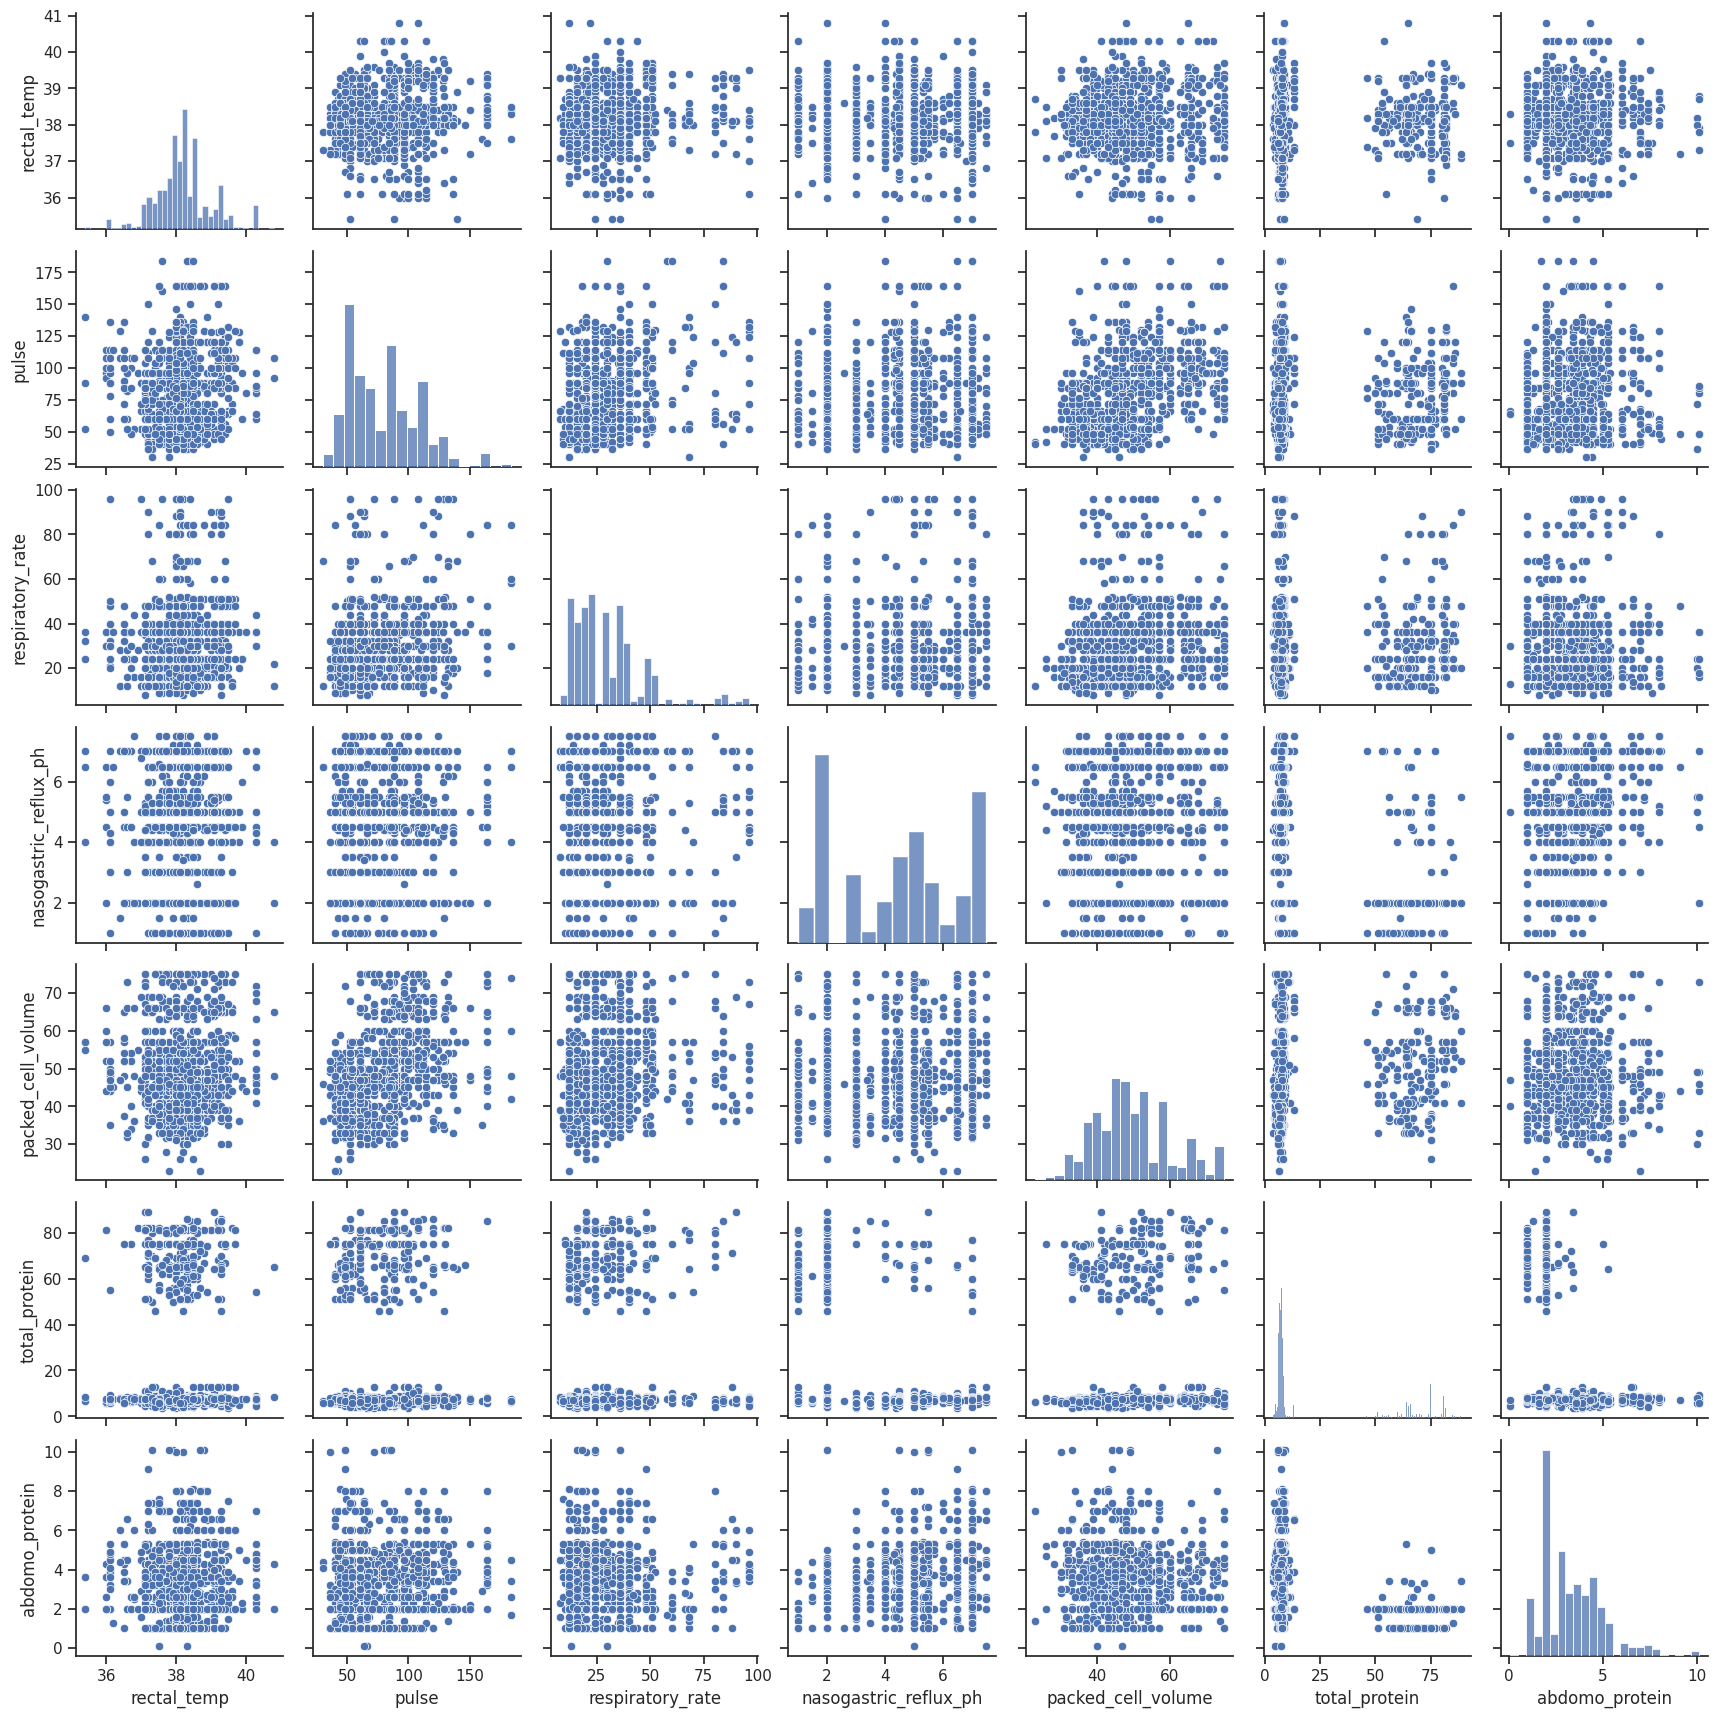

In [39]:
#Pairplot, eventhough prof said it is useless
numcol=[i for i in train.columns if train[i].dtypes==float]

sns.set(style="ticks")

# Create the scatter matrix using pairplot
sns.pairplot(train[numcol])

# Display the scatter matrix
plt.show()

In [ ]:
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            1235 non-null   int64  
 1   surgery                       1235 non-null   object 
 2   age                           1235 non-null   object 
 3   hospital_number               1235 non-null   int64  
 4   rectal_temp                   1235 non-null   float64
 5   pulse                         1235 non-null   float64
 6   respiratory_rate              1235 non-null   float64
 7   temp_of_extremities           1196 non-null   object 
 8   peripheral_pulse              1175 non-null   object 
 9   mucous_membrane               1214 non-null   object 
 10  capillary_refill_time         1229 non-null   object 
 11  pain                          1191 non-null   object 
 12  peristalsis                   1215 non-null   object 
 13  abd

In [38]:
#dropping the z score cols
train=train.drop(train.columns[29:41], axis=1)

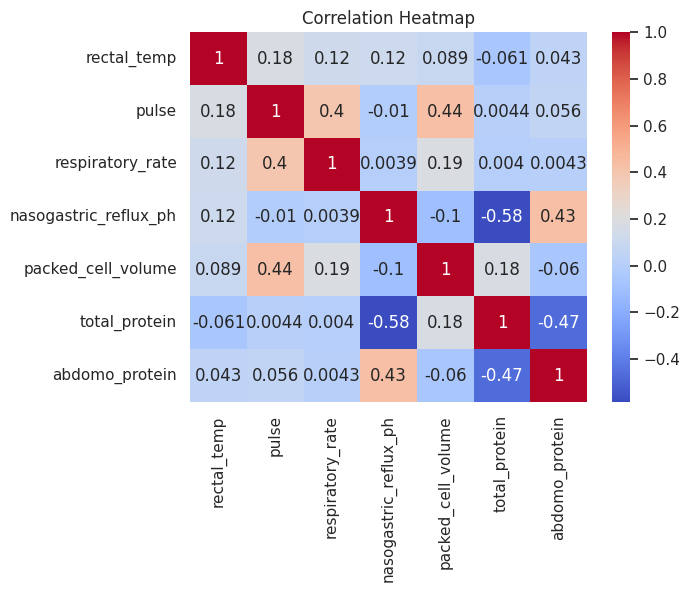

In [40]:
#Heatmap
sns.set(style="whitegrid")

# Create the heatmap
sns.heatmap(train[numcol].corr(), cmap="coolwarm", annot=True)

# Set the title of the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()

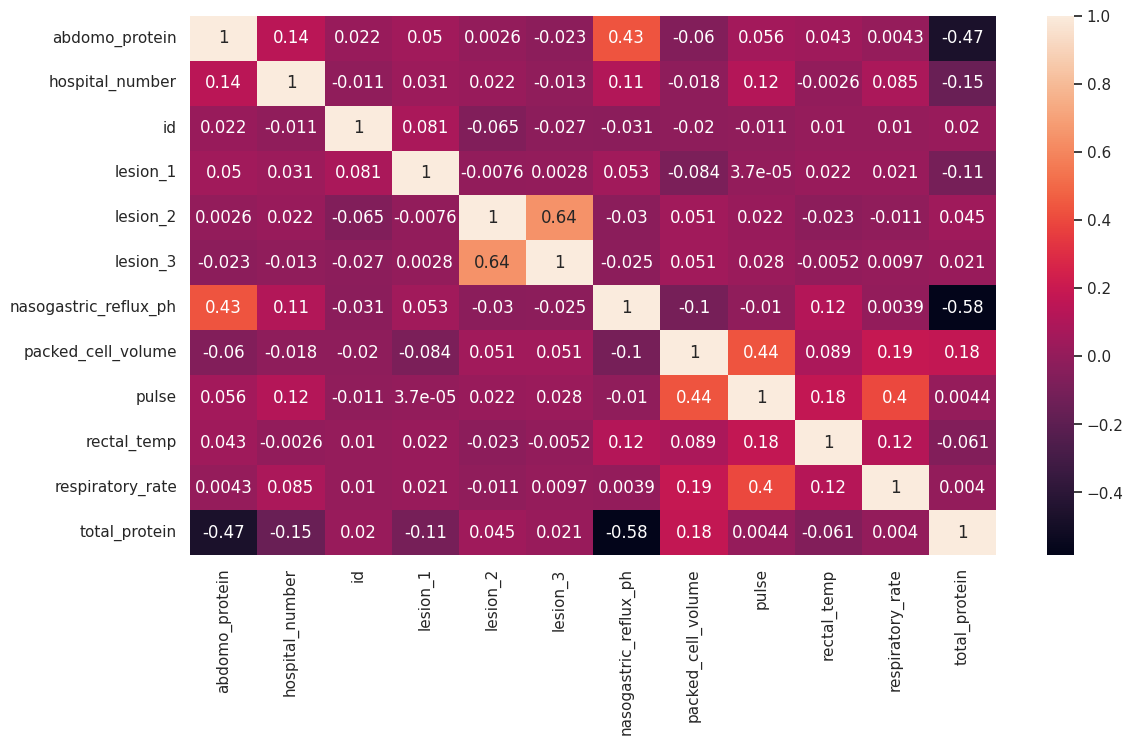

In [45]:

attr = train.columns.values
cat_attr = train.dtypes[train.dtypes == "object"].index.values   ## Categorical and Non-Numeric

num_attr = np.setdiff1d(attr, cat_attr)   #Numeric ( Categorical, Continuous, Discrete )
corr_matrix = train.loc[:, num_attr].corr()
plt.figure(figsize = (13, 7))
sns.heatmap(corr_matrix, annot = True)
plt.show()

columns that have too many unique values: ['id', 'hospital_number', 'lesion_1']


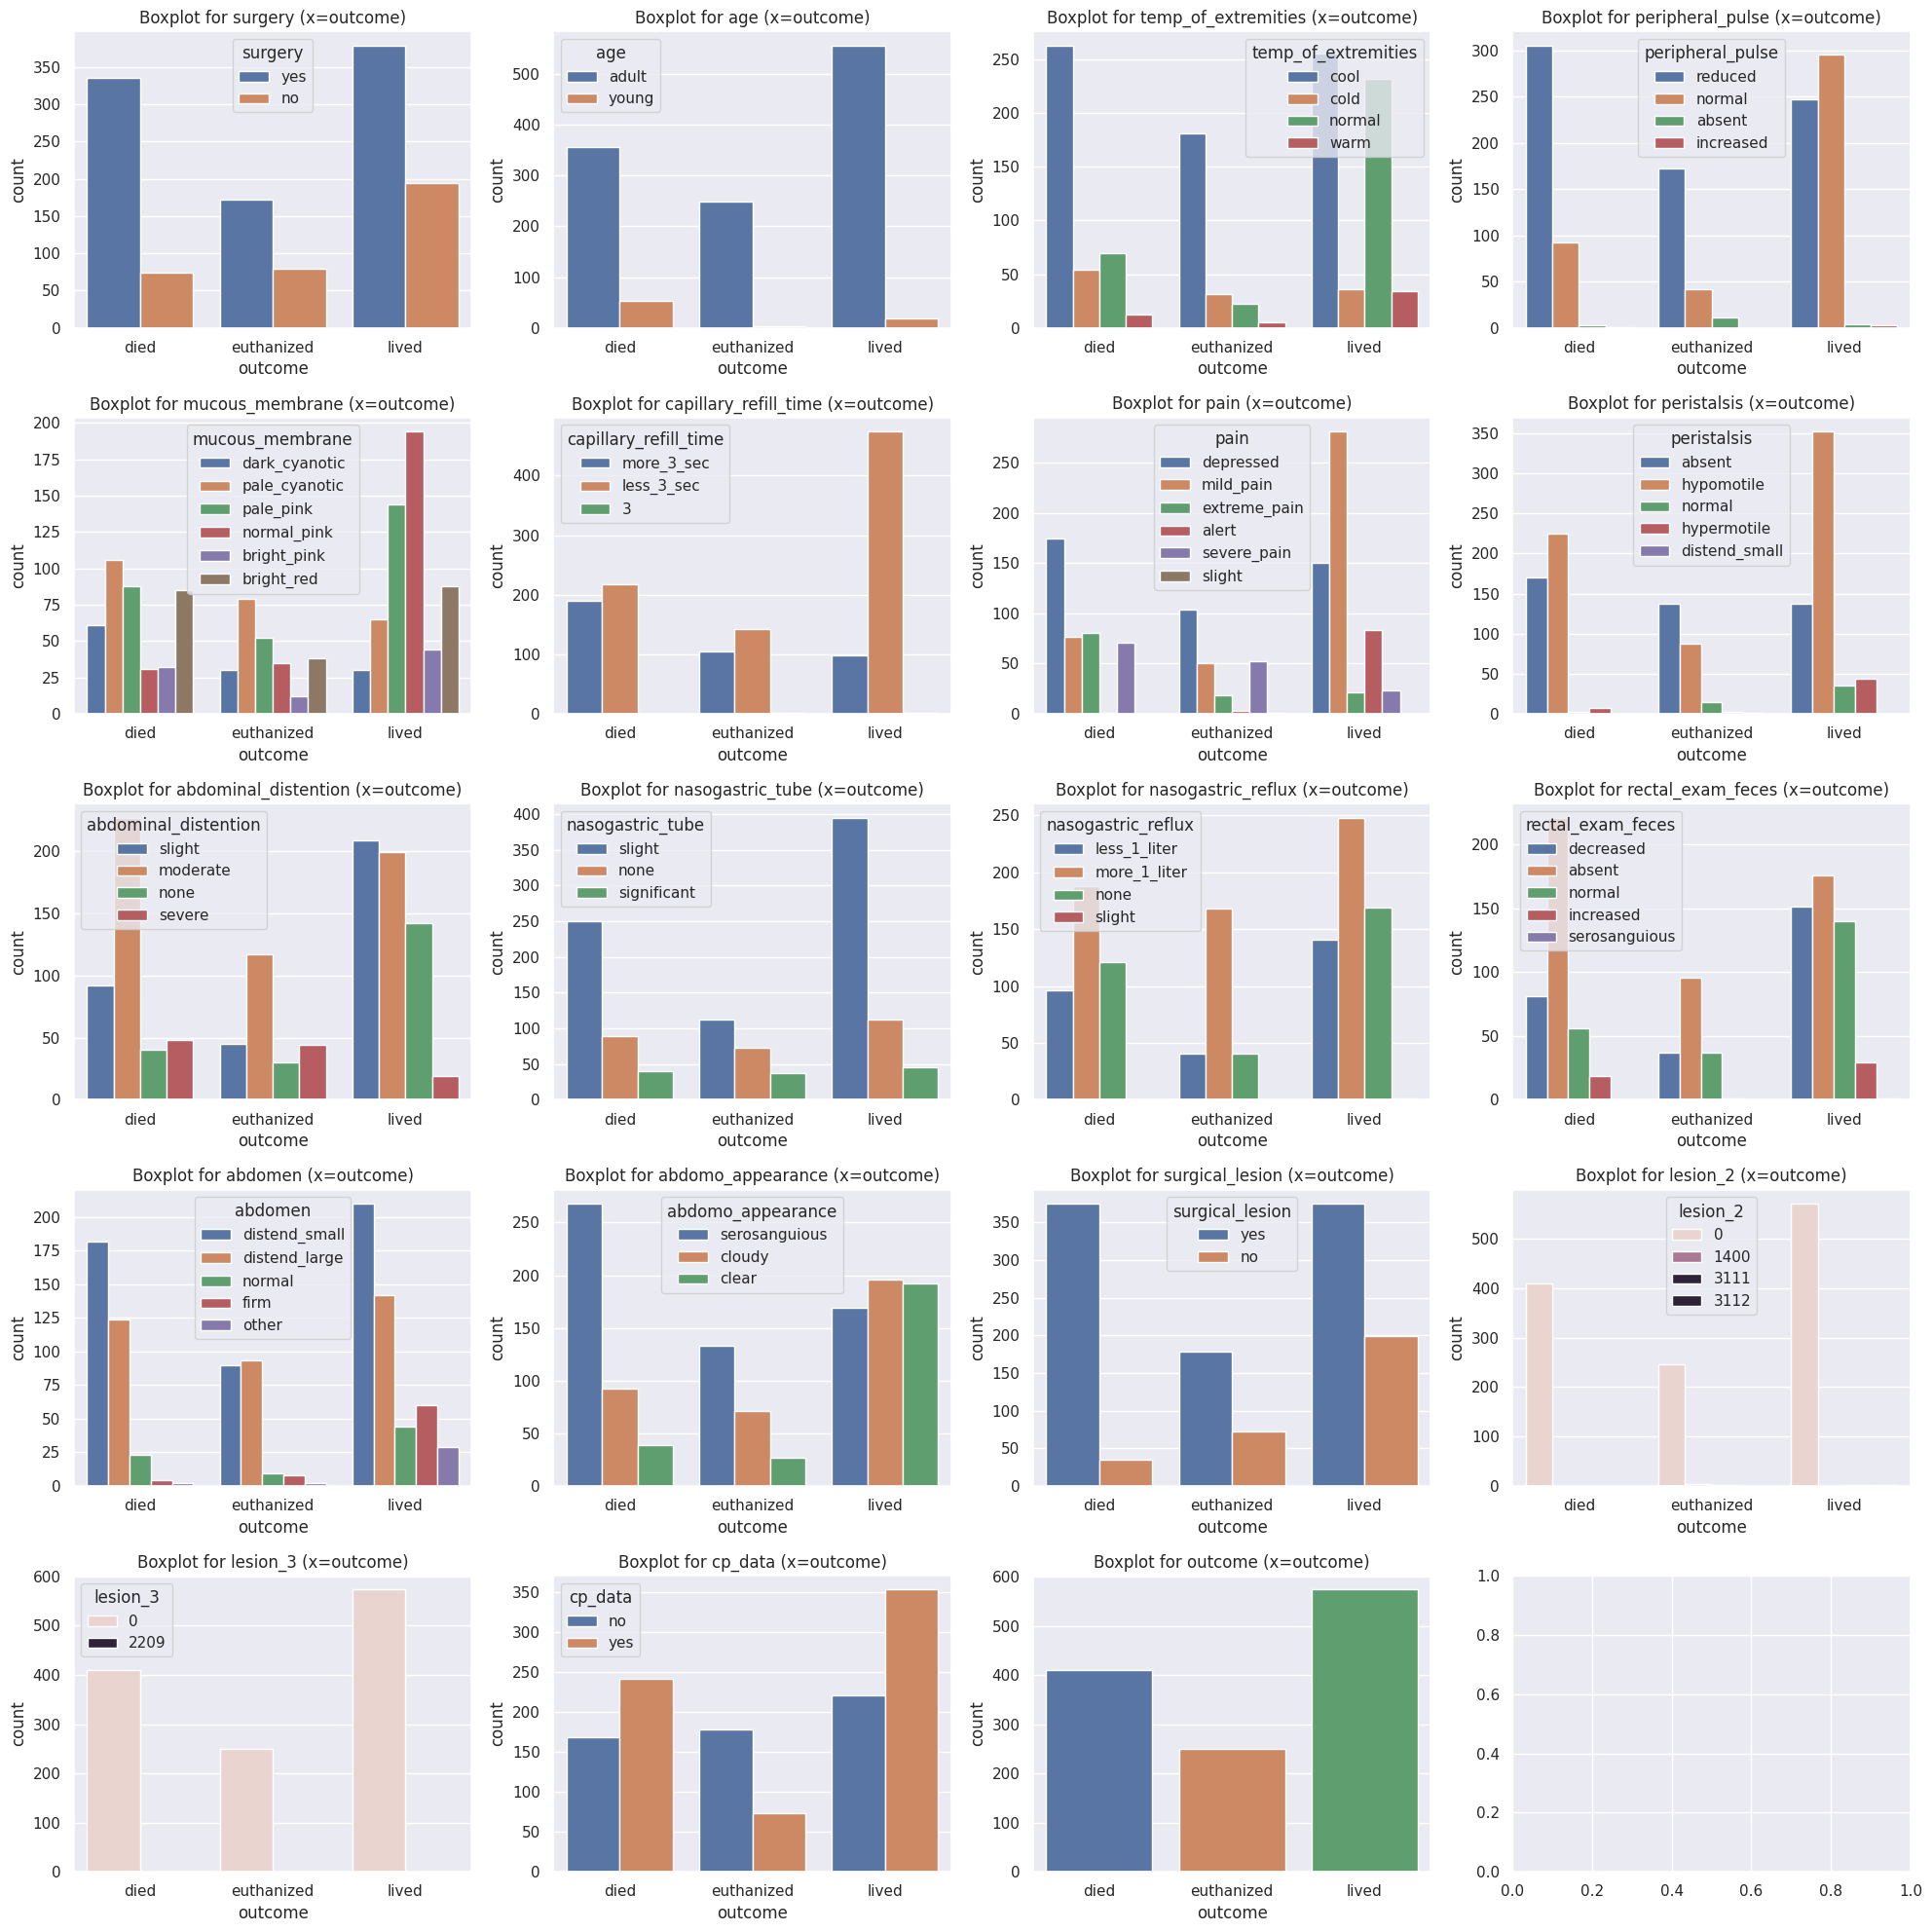

In [43]:
import math
cat_col=[i for i in train.columns if train[i].dtypes!=float]

sns.set(style="darkgrid")

cat_plot=[i for i in cat_col if train[i].nunique()<=8]
print('columns that have too many unique values:',[i for i in cat_col if i not in cat_plot])
target='outcome'

# Calculate the number of rows and columns required for the grid
n = len(cat_plot)
cols = min(n, 4)
rows = math.ceil(n / cols)

# Create the subplot grid
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))  # Adjust the figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each column name and corresponding axis
for i, (column, ax) in enumerate(zip(cat_plot, axes)):
    # Create the boxplot on the current axis
    sns.countplot(data=train, x=target, hue=column, ax=ax)
    ax.set_title(f"Boxplot for {column} (x={target})")

    # Hide empty subplots
    if i >= n:
        ax.set_axis_off()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
#pulse col and total protein look promising

CLEANING

In [46]:
train=train.drop(['id','hospital_number','lesion_2','lesion_3','cp_data'], axis=1)  #id and hospital number doesnt add value to the model performance, lesion2/3 have almost 90% zeros and cp data is if there is pathology infor or not(useless)
train.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,outcome
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,...,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,died
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,...,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,euthanized
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,...,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,lived
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,...,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,lived
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,...,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,lived


In [47]:
#Normalize continuous variables
num_col=[i for i in train.columns if train[i].dtypes==float]

scaler = MinMaxScaler()
train[num_col] = pd.DataFrame(scaler.fit_transform(train[num_col]), index=train.index, columns=num_col)

In [48]:
#One hot encode categorical variables
cat_col=[i for i in train.columns if train[i].dtypes!=float]
cat_col.remove('outcome')

OH_encoder = OneHotEncoder(sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train[cat_col]))
OH_cols_train.columns = OH_encoder.get_feature_names_out()

# One-hot encoding removed index; put it back
OH_cols_train.index = train.index

# Removing categorical columns (will replace with one-hot encoding)
num_X_train = train.drop(cat_col, axis=1)


# Add one-hot encoded columns to numerical features
train = pd.concat([num_X_train, OH_cols_train], axis=1)

#Changing died, euthanized, and lived to integer labels
map_list={'died':0,'euthanized':1,'lived':2}
train['outcome']=train['outcome'].map(map_list)

In [49]:
train.head()  #well that doesnt look great, I will drop lesion 1 also

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,outcome,surgery_no,surgery_yes,...,lesion_1_8300,lesion_1_8400,lesion_1_9400,lesion_1_11124,lesion_1_11300,lesion_1_11400,lesion_1_12208,lesion_1_21110,lesion_1_31110,lesion_1_41110
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,2,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Columns: 135 entries, rectal_temp to lesion_1_41110
dtypes: float64(134), int64(1)
memory usage: 1.3 MB


In [58]:
train = train.drop(train.columns[79:135], axis=1)
train.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,outcome,surgery_no,surgery_yes,...,abdomen_normal,abdomen_other,abdomen_nan,abdomo_appearance_clear,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,abdomo_appearance_nan,surgical_lesion_no,surgical_lesion_yes,lesion_1_0
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,2,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


MACHINE LEARNING

In [59]:
Y_train=train['outcome']
X_train=train.drop(['outcome'],axis=1)

xtrain,xtest,ytrain,ytest=train_test_split(X_train, Y_train, test_size=0.2, random_state=42)    #standard 80/20 %

In [60]:
#Will be using Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42).fit(xtrain, ytrain)
ypred=rf.predict(xtest)
print('The Accuracy of Random Forest is:',accuracy_score(ypred, list(ytest)))

The Accuracy of Random Forest is: 0.6963562753036437


In [61]:
#The RF was quite low, i will try XGB
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=42).fit(xtrain, ytrain)
ypred=xgb_classifier.predict(xtest)
print('The Accuracy of XGB classifier is:',accuracy_score(ypred, list(ytest)))

The Accuracy of XGB classifier is: 0.6680161943319838


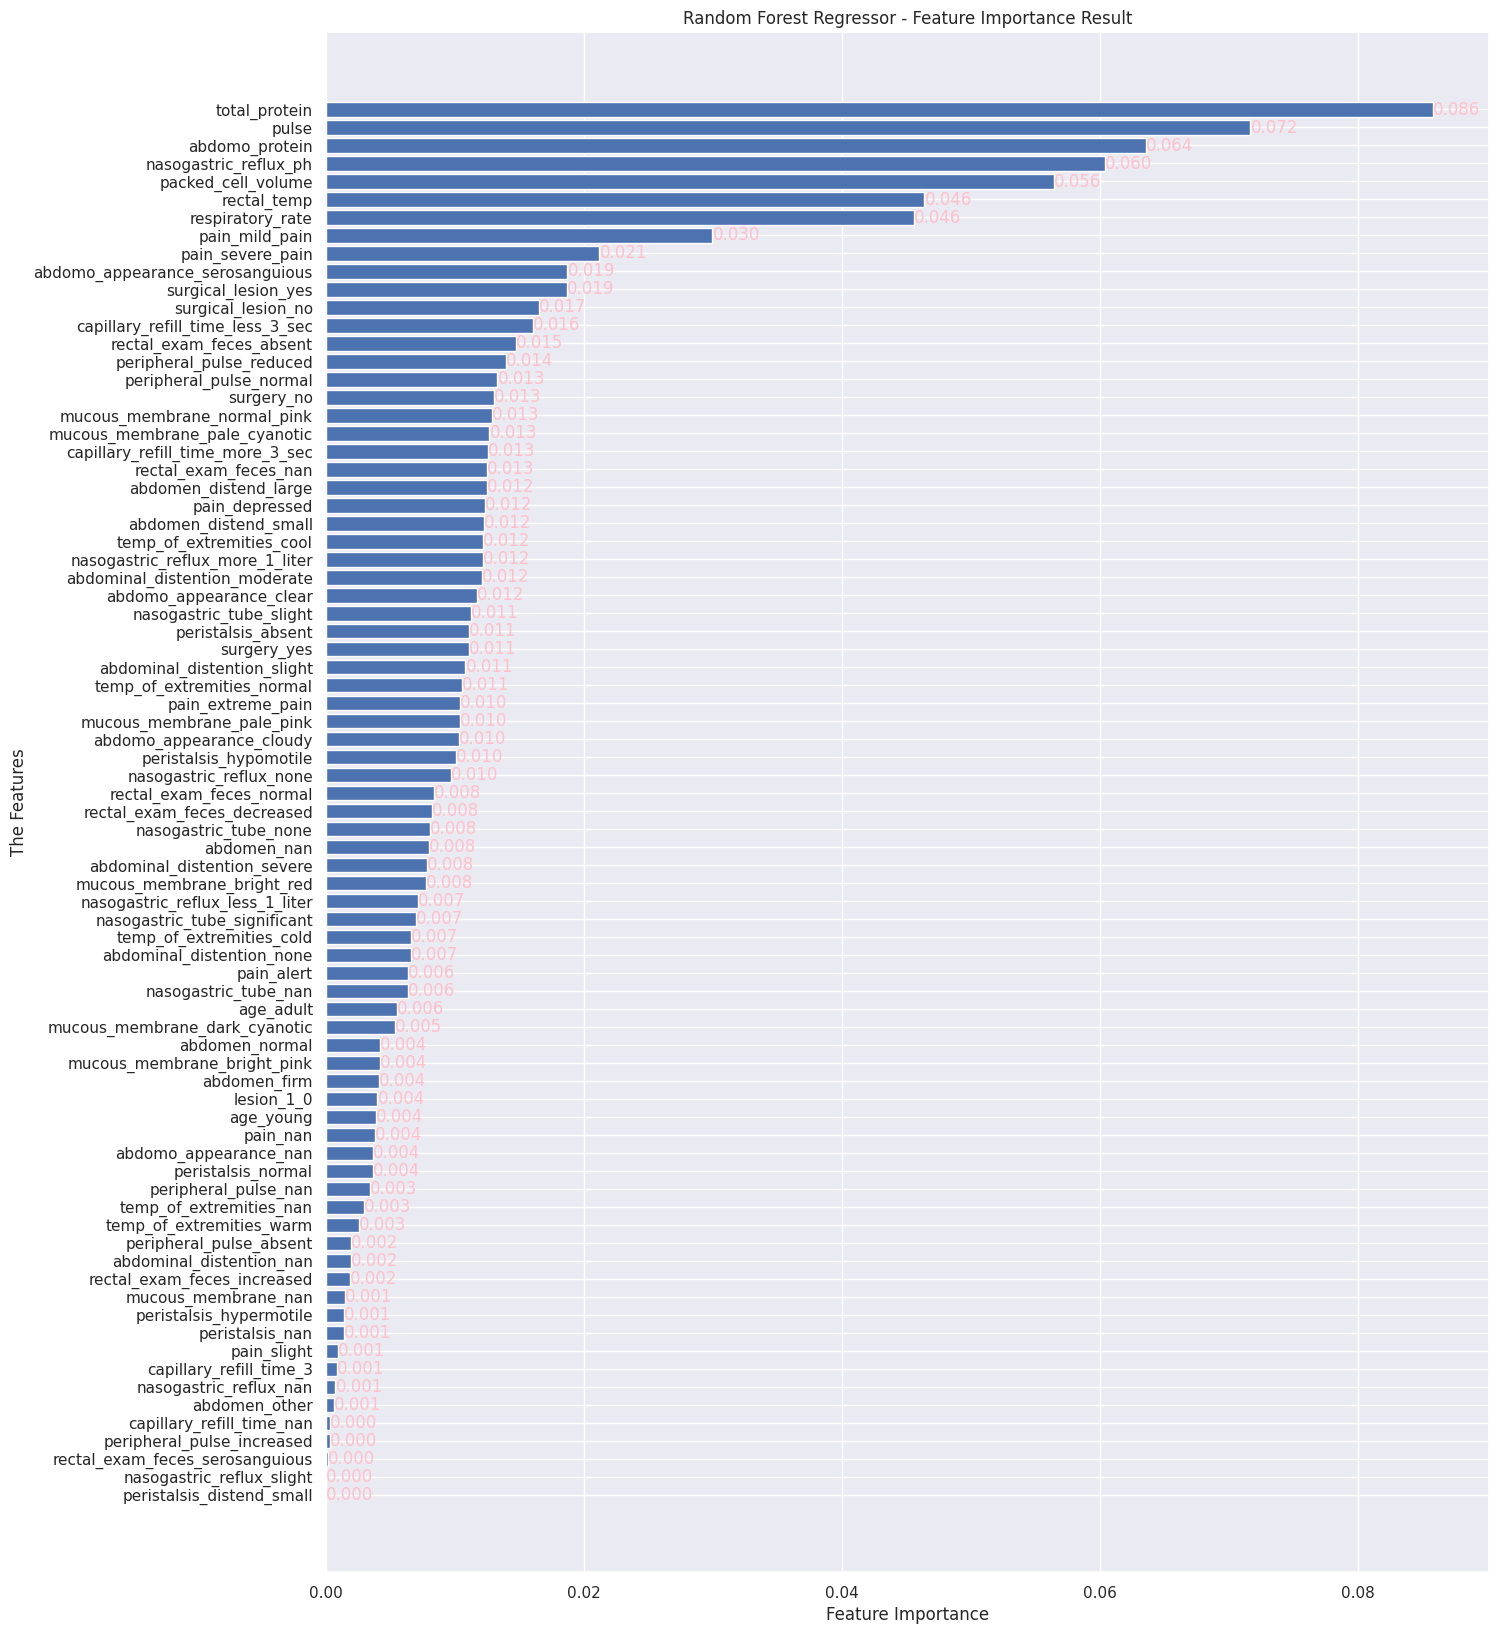

In [62]:
#I will do rf feature importance to see if the variables I envisioned are at least top 7
importance = rf.feature_importances_

# Get feature names
feature_names = xtrain.columns

# Sort feature importance scores and feature names in descending order
sorted_idx = importance.argsort()[::]
sorted_names = feature_names[sorted_idx]

# Plot feature importance
plt.figure(figsize=(15, 20))
plt.barh(range(len(importance)), importance[sorted_idx], align='center')
plt.yticks(range(len(importance)), sorted_names)

plt.xlabel("Feature Importance")
plt.ylabel("The Features")
plt.title("Random Forest Regressor - Feature Importance Result")

for i, v in enumerate(importance[sorted_idx]):
    plt.text(v, i, f"{v:.3f}", color='pink', va='center')

plt.show()

I was right :)

In [63]:
test.head()
Id=test['id'] -#the col in the result along with outcome

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,1235,no,adult,534053,38.6,40.0,20.0,normal,normal,normal_pink,...,distend_small,42.0,7.5,clear,2.3,no,0,0,0,no
1,1236,yes,adult,528469,38.2,112.0,48.0,cool,reduced,bright_pink,...,distend_small,44.0,6.0,serosanguious,2.6,no,2208,0,0,yes
2,1237,yes,adult,528178,37.7,66.0,12.0,cool,normal,bright_red,...,distend_small,31.5,6.0,cloudy,1.6,yes,2205,0,0,yes
3,1238,no,adult,534784,37.1,88.0,20.0,cool,reduced,pale_cyanotic,...,distend_large,75.0,81.0,NaN,1.0,yes,1400,0,0,no
4,1239,yes,adult,529840,38.3,50.0,12.0,NaN,normal,bright_pink,...,distend_small,37.0,6.8,cloudy,2.6,yes,2208,0,0,yes


In [68]:
#test=test.drop(['id','hospital_number','lesion_2','lesion_3','cp_data'], axis=1)

test=# Reload the original dataset or load the column from another source
test_df = pd.read_csv('/content/test.csv')   #i already dropped a col I shouldnt now it wont load

#One hot encode categorical variables
OH_cols_test = pd.DataFrame(OH_encoder.transform(test[cat_col]))
OH_cols_test.columns = OH_encoder.get_feature_names_out()

# One-hot encoding removed index; put it back
OH_cols_test.index = test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_test = test.drop(cat_col, axis=1)

# Add one-hot encoded columns to numerical features
test = pd.concat([num_X_test, OH_cols_test], axis=1)

test.head()

KeyError: "['lesion_1'] not in index"

In [66]:
test.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,...,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion
0,no,adult,38.6,40.0,20.0,normal,normal,normal_pink,less_3_sec,mild_pain,...,none,none,7.0,normal,distend_small,42.0,7.5,clear,2.3,no
1,yes,adult,38.2,112.0,48.0,cool,reduced,bright_pink,more_3_sec,depressed,...,slight,none,3.5,decreased,distend_small,44.0,6.0,serosanguious,2.6,no
2,yes,adult,37.7,66.0,12.0,cool,normal,bright_red,less_3_sec,mild_pain,...,slight,none,3.0,normal,distend_small,31.5,6.0,cloudy,1.6,yes
3,no,adult,37.1,88.0,20.0,cool,reduced,pale_cyanotic,less_3_sec,depressed,...,slight,more_1_liter,2.0,absent,distend_large,75.0,81.0,NaN,1.0,yes
4,yes,adult,38.3,50.0,12.0,NaN,normal,bright_pink,less_3_sec,mild_pain,...,slight,none,3.0,decreased,distend_small,37.0,6.8,cloudy,2.6,yes


In [67]:
#getting my prediction table, this is the code (error shown because I accidentally dropped a col i shouldnt have and cant add because id col is also gone)
reverse_dict = {v: k for k, v in map_list.items()}
ypred=rf.predict(test)

output = pd.DataFrame({'id': Id,'outcome': ypred })
output['outcome']=output['outcome'].map(reverse_dict)
output.head()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- abdomen
- abdominal_distention
- abdomo_appearance
- age
- capillary_refill_time
- ...
Feature names seen at fit time, yet now missing:
- abdomen_distend_large
- abdomen_distend_small
- abdomen_firm
- abdomen_nan
- abdomen_normal
- ...
